In [1]:
import os
import glob2

from matplotlib import pyplot as plt

os.chdir('..')
os.chdir('./catxas')
import catxas

No conda env active, defaulting to base


#  1. Define directory containing FEFF inp files

In [2]:
### Modify paths inside the '' ###

# Folder containing FEFF Inp (*.inp) files
inp_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Manuscripts and Presentations\2021\Bare - AIChE 2021\Feff Plots\KAuCl4'

# 2. Define Plotting Window in R

In [3]:
### Define plotting bounds ###
xmin = 1
xmax = 6
xlabel = 'R (Å)'
ylabel = 'Degenercy (Coordination Number)'

# 3. Extract .inp files 

In [4]:
inp_files = glob2.glob(inp_dir+'\*.inp')

# 4. Calcuate, Save and Plot Scattering Paths

Successfully created subdirectory
Successfully created subdirectory
 : ======== running Feff module C:\ProgramData\Anaconda3\lib\site-packages\larch\bin\win64\feff6l.exe ========
 : Feff 6L.02
 : KAuCl4
 : Calculating potentials and phases...
 : free atom potential and density for atom type    0
 : free atom potential and density for atom type    1
 : free atom potential and density for atom type    2
 : free atom potential and density for atom type    3
 : overlapped potential and density for unique potential    0
 : overlapped potential and density for unique potential    1
 : overlapped potential and density for unique potential    2
 : overlapped potential and density for unique potential    3
 : muffin tin radii and interstitial parameters
 : phase shifts for unique potential    0
 : phase shifts for unique potential    1
 : phase shifts for unique potential    2
 : phase shifts for unique potential    3
 : Preparing plane wave scattering amplitudes...
 : nncrit in prcrit       9


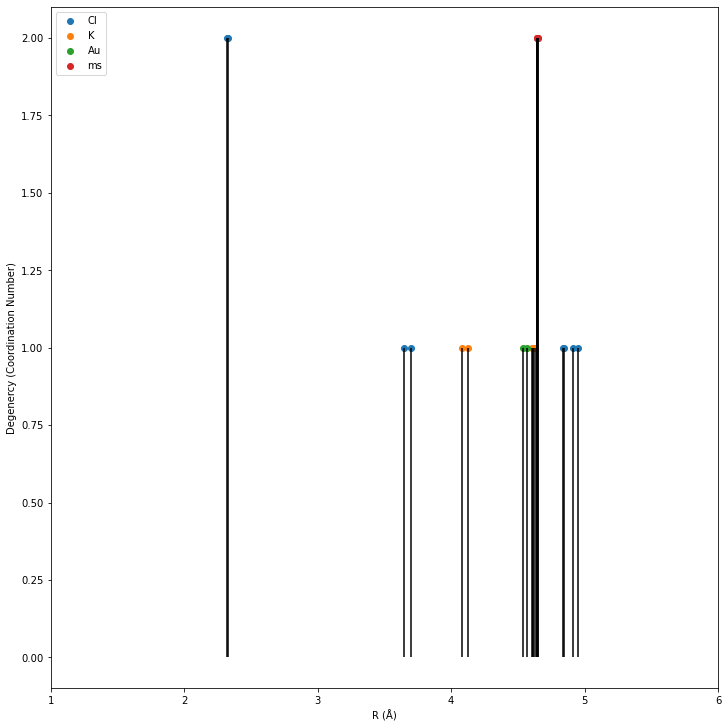

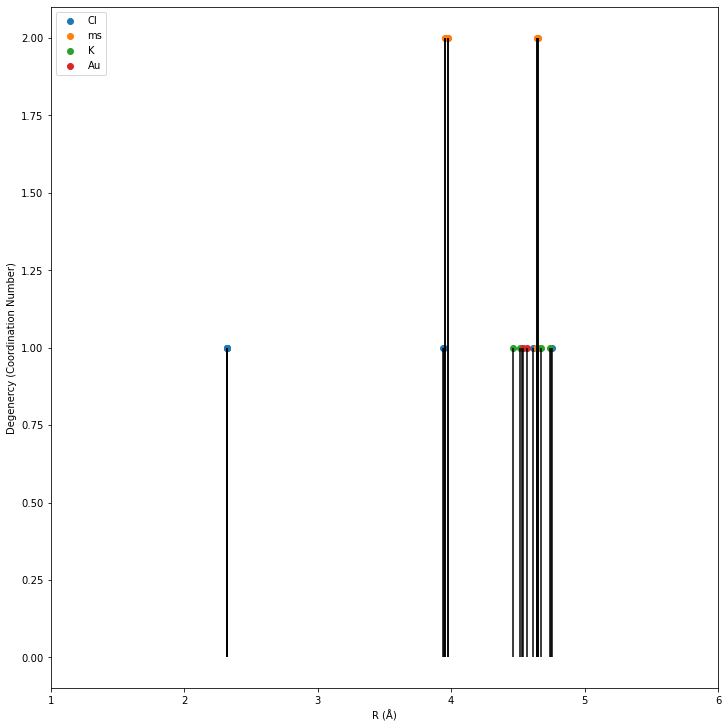

In [5]:
for line in inp_files:
    # Create Results Directory
    catxas.create_subdir(inp_dir, os.path.basename(line)[:-4]+'_results')
    result_dir = os.path.join(inp_dir, os.path.basename(line)[:-4]+'_results')
    
    # Runn FEFF and Create Summary Dictionary
    feff_summary = catxas.feff_PathSummary(line, sigma2 = 0.003, feff = 6)
    
    # Plot Paths from Summary
    path_plt = catxas.plot_feff_paths(feff_summary, xmin= xmin, xmax=xmax, xlabel = xlabel, ylabel = ylabel)
    
    # Save Figure
    path_plt.savefig(os.path.join(result_dir,os.path.basename(line)[:-4]+'.png'), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    # Save csv file of single and multiple scattering paths
    for key in feff_summary['Path_Summary'].keys():
        feff_summary['Path_Summary'][key][['Backsactterer', 'Reff', 'Degen']].to_csv(os.path.join(result_dir,os.path.basename(line)[:-4]+f'_{key}_Backscatterer.csv'), sep=',', header=True, index=False,)
    